In [27]:
%pylab inline
%load_ext autoreload
%autoreload 2

from datetime import datetime, timedelta

import os
import sys

import numpy as np
import pandas as pd
from scipy import sparse
import sklearn as sl
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import theanets as tn

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
if os.name == 'nt':
    TRAIN_PATH = r'D:\train.csv'
    PTRAIN_PATH = r'D:\train_preprocessed2.csv'
    TEST_PATH = r'D:\test.csv'
    GOOGNEWS_PATH = r'D:\GoogleNews-vectors-negative300.bin.gz'
    VOCAB_PATH = r'D:\big.txt'
else:
    TRAIN_PATH = r'/media/speedy/train.csv'
    PTRAIN_PATH = r'/media/speedy/train_preprocessed2.csv'
    TEST_PATH = r'/media/speedy/test.csv'
    GOOGNEWS_PATH = r'/media/speedy/GoogleNews-vectors-negative300.bin.gz'
    VOCAB_PATH = r'/media/speedy/big.txt'
df = pd.read_csv(PTRAIN_PATH, dtype=np.float32)

In [3]:
X = df.loc[:, df.columns != 'target']
y = df['target']

In [78]:
X_scaled = (X - X.mean())/X.std()

,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR_0354=u,VAR_0466=i,VAR_0467=discharge na,VAR_0467=discharged,VAR_0467=dismissed,VAR_1934=branch,VAR_1934=caps,VAR_1934=is,VAR_1934=mobile,VAR_1934=rec
0,0.828161,-0.702888,0.047078,-0.432670,-0.436626,-0.432670,-0.443476,-0.476462,-0.394987,-0.423884,...,-1.330274,NaN,-0.027034,0.108326,-0.104757,-0.923033,1.058519,-0.147476,-0.169824,-0.140548
1,-0.685551,-0.281913,0.059131,0.190857,-0.436626,0.190857,-0.443476,0.522908,0.487472,0.430090,...,-1.330274,NaN,-0.027034,0.108326,-0.104757,-0.923033,1.058519,-0.147476,-0.169824,-0.140548
2,0.074792,-0.679060,-0.021005,-0.432670,-0.436626,-0.432670,-0.443476,-0.476462,-0.394987,-0.423884,...,0.751523,NaN,-0.027034,0.108326,-0.104757,-0.923033,1.058519,-0.147476,-0.169824,-0.140548
3,0.939771,1.679992,-0.042505,-0.432670,-0.436626,-0.432670,-0.443476,-0.476462,0.487472,-0.423884,...,0.751523,NaN,-0.027034,0.108326,-0.104757,-0.923033,-0.944553,-0.147476,-0.169824,7.105424
4,-0.232135,1.370217,-0.140231,-0.432670,-0.436626,-0.432670,-0.443476,-0.476462,-0.394987,-0.423884,...,-1.330274,NaN,-0.027034,0.108326,-0.104757,1.084650,-0.944553,-0.147476,-0.169824,-0.140548
5,-0.706478,-0.671117,0.057014,-0.432670,-0.436626,-0.432670,-0.443476,-0.476462,-0.394987,-0.423884,...,-1.330274,NaN,-0.027034,0.108326,-0.104757,-0.923033,1.058519,-0.147476,-0.169824,-0.140548
6,-0.315843,0.345579,2.954442,0.190857,0.414232,0.190857,0.453354,0.522908,0.487472,-0.423884,...,-1.330274,NaN,-0.027034,0.108326,-0.104757,-0.923033,1.058519,-0.147476,-0.169824,-0.140548
7,-0.643698,-0.107168,-0.009929,-0.432670,-0.436626,-0.432670,-0.443476,-0.476462,-0.394987,-0.423884,...,-1.330274,NaN,-0.027034,0.108326,-0.104757,-0.923033,1.058519,-0.147476,-0.169824,-0.140548
8,-0.615795,-0.575801,-0.116125,0.190857,0.414232,0.190857,0.453354,0.522908,-0.394987,0.430090,...,0.751523,NaN,-0.027034,0.108326,-0.104757,-0.923033,-0.944553,-0.147476,5.896003,-0.140548
9,-0.566966,-0.130997,-0.266461,-0.432670,-0.436626,-0.432670,-0.443476,-0.476462,-0.394987,-0.423884,...,0.751523,NaN,-0.027034,0.108326,-0.104757,1.084650,-0.944553,-0.147476,-0.169824,-0.140548


# PCA and plot

In [18]:
pca = PCA(n_components=2)
X_pca_ed = pca.fit_transform(X_scaled)

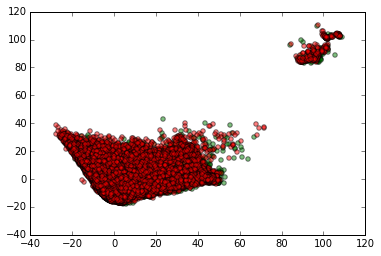

In [50]:
XT = X_pca_ed.T
f = figure()
ax = f.gca()
ax.scatter(XT[0, np.asarray(y, dtype=np.bool)], XT[1, np.asarray(y, dtype=np.bool)], c='g', alpha=0.5)
ax.scatter(XT[0, ~np.asarray(y, dtype=np.bool)], XT[1, ~np.asarray(y, dtype=np.bool)], c='r', alpha=0.5)


# Autoencode and plot

In [ ]:
exp = tn.Experiment(tn.Autoencoder,
                    layers=(X_scaled.shape[1], X_scaled.shape[1]*2,
                            2,
                            (X_scaled.shape[1]*2, 'tied'), (X_scaled.shape[1], 'tied')))

kwargs = {'algorithm': 'rmsprop',
          'learning_rate': 0.0001, 'momentum': 0.9,
          'input_dropout': 0.3, 'hidden_dropout': 0.3}

for train, _ in exp.itertrain(X_scaled, **kwargs):
    print 'training loss:', train['loss']
exp.save('/home/mtambos/kaggle/springleaf/autoencoder_trainset2.pickle')

In [69]:
X_autoencoded = np.empty((X_scaled.shape[0], 2))
step = 20000
for i in xrange(0, X_autoencoded.shape[0], step):
    print "encoding %s:%s" % (i, i+step)
    X_autoencoded[i:i+step, :] = exp.network.encode(X_scaled[i:i+step, :])

encoding 0:20000
encoding 20000:40000
encoding 40000:60000
encoding 60000:80000
encoding 80000:100000
encoding 100000:120000
encoding 120000:140000
encoding 140000:160000


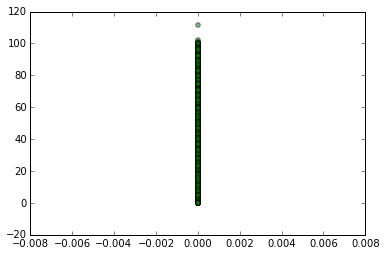

In [72]:
XT = X_autoencoded.T
f = figure()
ax = f.gca()
ax.scatter(XT[0, np.asarray(y, dtype=np.bool)], XT[1, np.asarray(y, dtype=np.bool)], c='g', alpha=0.5)
ax.scatter(XT[0, ~np.asarray(y, dtype=np.bool)], XT[1, ~np.asarray(y, dtype=np.bool)], c='r', alpha=0.5)
